# Projeto de dados do mercado financeiro


____
## Objetivo: ver como os bancos performaram durante a [crise financeira](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) até o início de 2016.

## Obter dados

Usaremos o pandas para ler diretamente os dados das finanças do yahoo usando pandas!

Primeiro, precisamos começar com as importações adequadas:

* Nota: [Você precisará instalar pandas-datareader para que isso funcione!](Https://github.com/pydata/pandas-datareader) O datareader Pandas permite que você [leia informações de estoque diretamente da internet](http : //pandas.pydata.org/pandas-docs/stable/remote_data.html) Use estes links para orientação de instalação (** pip install pandas-datareader **), ou simplesmente acompanhe a conferência de vídeo. *


In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Dados

Precisamos obter dados usando o datareader de pandas. Obteremos informações sobre ações para os seguintes bancos:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Vamos usar o período de ações de 1 de janeiro de 2006 a 1º de janeiro de 2016 para cada um desses bancos. Para isso foi definido cada banco como um dataframe separado, com o nome da variável para que esse banco seja seu símbolo de ticker. Isso envolveu algumas etapas: **
1. Usar datetime para definir objetos de início e fim de data e hora.
2. Descobrir o símbolo do ticker para cada banco.
2. Descubra como usar o datareader para pegar as cotações.



In [4]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [5]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [5]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

** Criando uma lista dos símbolos dos tickers (como strings) em ordem alfabética. Nome da lista: tickers **

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Usando pd.concat para concatenar os DataFrames do banco juntos em um único chamado bank_stocks. E definido o argumento das chaves igual à lista de tickers. **

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

** Definindo os níveis dos nomes das colunas: **

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Verificando o cabeçalho do DataFrame bank_stocks. **

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   35.953278  493.799988  481.100006  490.000000  492.899994   
2006-01-04   35.571438  491.000000  483.500000  488.600006  483.799988   
2006-01-05   35.617275  487.799988  484.000000  484.399994  486.200012   
2006-01-06   35.563797  489.000000  482.000000  488.799988  486.200012   
2006-01-09   35.586720  487.399994  483.000000  486.000000  483.899994   

Bank Ticker    ...             MS                                         WFC  \
Stock Info     ...           Open      Close     Volume  Adj Close       High   
Date           ...                                                              
2006-01-03     ...      57.169998  58.310001  5377000.0  38.591286  31.975000   
2006-01-04     ...      58.700001  58.349998  7977800.0  38.617764  31.820000   
2006-01-05     ...      58.549999  58.509998  5778000.0  38.723652  31.555000   
2006-01-06     ...      58.770000  58.570000  6889800.0  38.763355  31.775000   
2006-01-09     ...      58.630001  59.189999  4144500.0  39.173679  31.825001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  21.485973  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  21.236753  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  21.213186  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  21.337786  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  21.334421  

[5 rows x 36 columns]

# Análise de dados exploratória

Nota: Antes de prosseguir, sugiro que você verifique a documentação no [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) e [Usando .xs](http: // pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Consulte as soluções se você não consegue descobrir como usar .xs (), uma vez que isso será uma parte importante desse projeto.

** Qual é o preço máximo de fechamento para o estoque de cada banco durante todo o período? **

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** O DataFrame returns conterá os retornos para o ação de cada banco. Os retornos geralmente são definidos por: **

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

** Usando o método pct_change () pandas na coluna close para criar uma coluna que represente esse valor de retorno. Depois criamos um loop for que vá e para cada Bank Stock Ticker cria essa coluna de retorno e configura-a como uma coluna nos dados DataFrame. **

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Parplot utilizando seaborn no dataframe de retorno. **

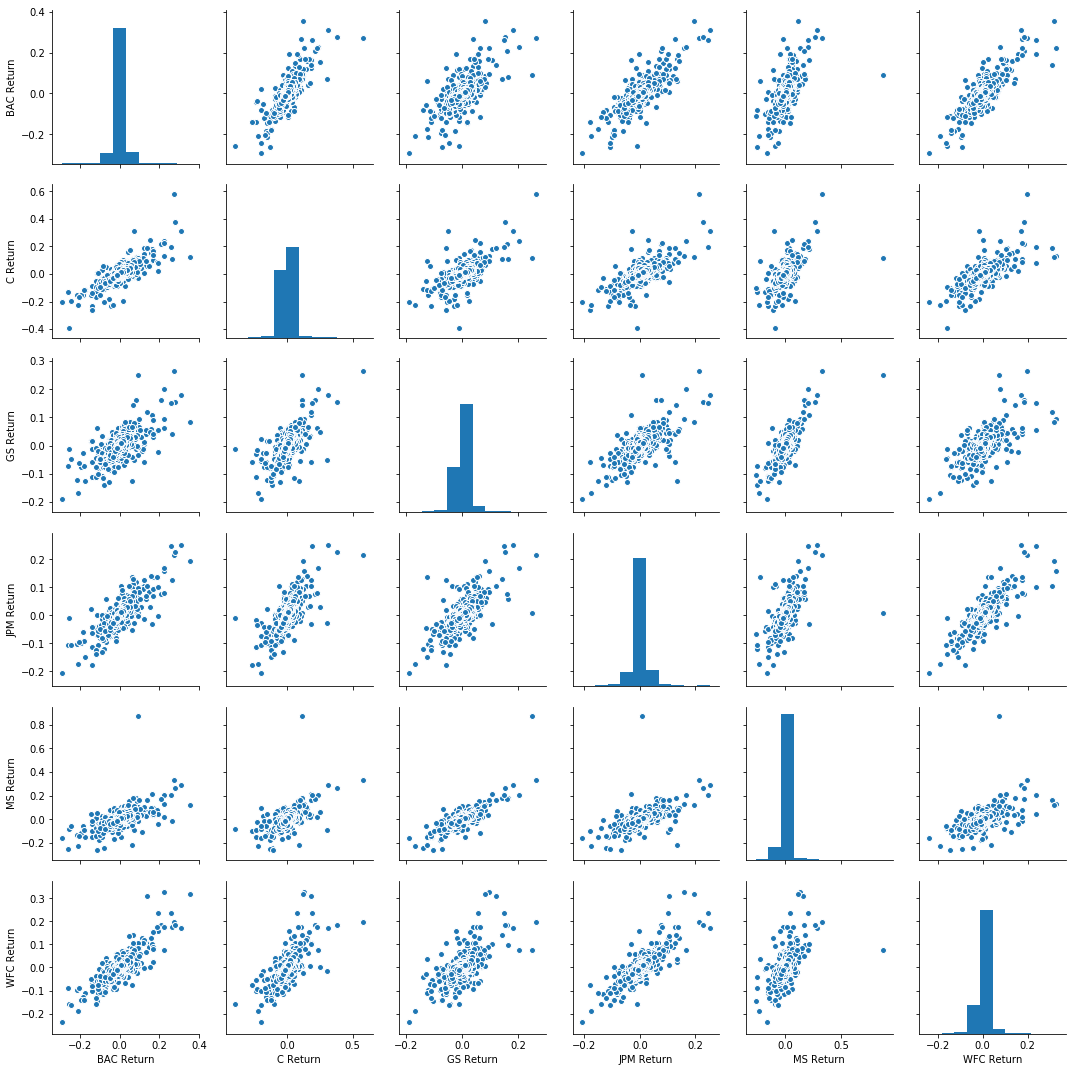

In [13]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

** Usando o DataFrame returns, quero saber quais datas cada ação dos bancos teve o melhor e o pior dia de retorno. Notamos que 4 dos bancos compartilham o mesmo dia para a pior queda. Alguma coisa significante aconteceu naquele dia? **

In [14]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [15]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Dê uma olhada no desvio padrão dos retornos. Qual ação você classificaria como a mais arriscada durante todo o período de tempo? Qual você classificaria como a mais arriscado para o ano 2015? **

In [16]:
returns.std() # Citigroup é a mais arriscada

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [17]:
returns.ix['2015-01-01':'2015-12-31'].std() # Muito similares, mas podemos escolher Morgan Stanley ou BofA

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Crie um distplot usando seaborn dos retornos de 2015 para Morgan Stanley **

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


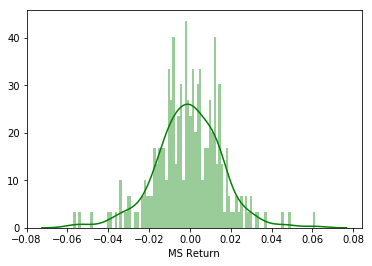

In [18]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Crie um distplot usando seaborn dos retornos de 2008 para CitiGroup **

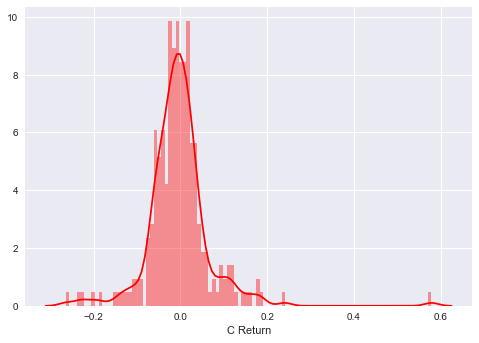

In [18]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

# Mais visualização

Muito desse projeto se concentrará em visualizações. Sinta-se livre para usar qualquer uma das suas bibliotecas de visualização preferidas para tentar recriar os plots descritos abaixo, seaborn, matplotlib, plotly e cufflinks, ou apenas pandas.

### Importações

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Crie um gráfico de linha mostrando o preço de fechamento para cada banco para todo o índice de tempo. (Sugestão: tente usar um loop for ou use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) para obter uma seção transversal dos dados .) **

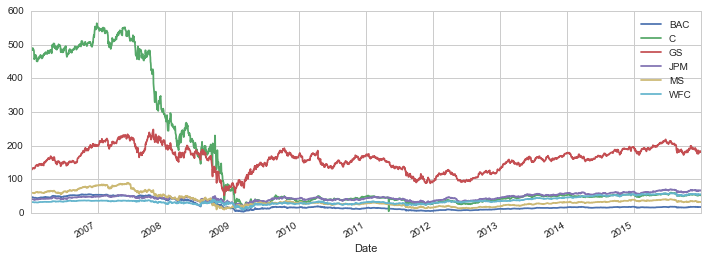

In [17]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

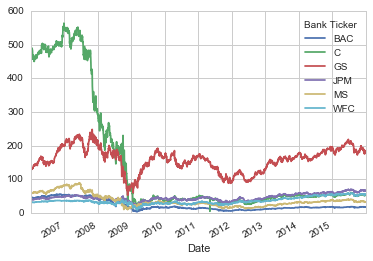

In [18]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

## Médias móveis

Vamos analisar as médias móveis para essas ações no ano de 2008.

** Trace a média de 30 dias para o preço próximo do Bank Of America para o ano de 2008 **

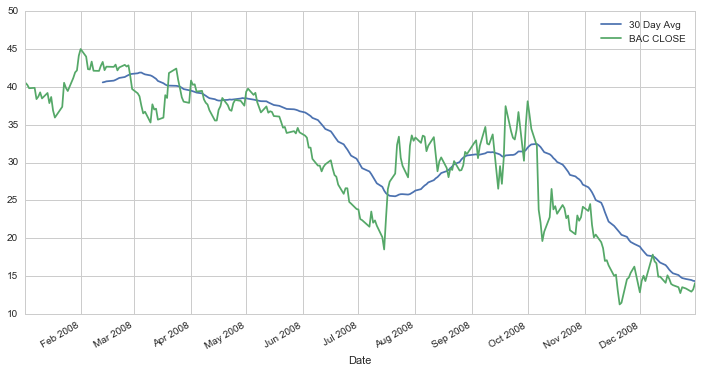

In [141]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Crie um mapa de calor da correlação entre os preços de fechamento das ações. **

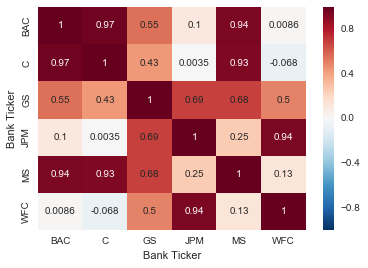

In [41]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Opcional: use o clustermap do seaborn para agrupar as correlações: **

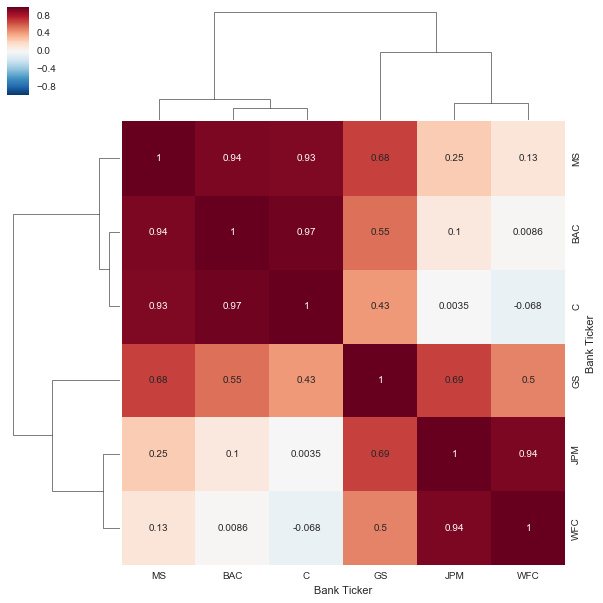

In [26]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Definitivamente, muitos tópicos de finanças específicos aqui, então não se preocupe se você não os entendeu todos! A única coisa que você deve estar preocupado com a compreensão são os pandas básicos e operações de visualização.